In [20]:
import gzip
import h5py
import os
import numpy as np
os.listdir('../datasets/cat_vs_noncat')


['test_catvnoncat.h5', 'train_catvnoncat.h5']

In [21]:
def load_dataset():
    testfile=h5py.File('../datasets/cat_vs_noncat/test_catvnoncat.h5','r')
    trainfile=h5py.File('../datasets/cat_vs_noncat/train_catvnoncat.h5','r')
    x_test=testfile['test_set_x']
    y_test=testfile['test_set_y']
    x_train=trainfile['train_set_x']
    y_train=trainfile['train_set_y']
    x_train=np.asarray(x_train)
    x_test=np.asarray(x_test)
    y_train=np.asarray(y_train)
    y_test=np.asarray(y_test)
    y_train=y_train.reshape((1,y_train.shape[0]))
    y_test=y_test.reshape((1,y_test.shape[0]))
    return x_train,y_train,x_test,y_test


In [22]:
x_train,y_train,x_test,y_test=load_dataset()

In [23]:
print("X_train shape: ",x_train.shape)
print("y_train shape: ",y_train.shape)
print("X_test shape: ",x_test.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (209, 64, 64, 3)
y_train shape:  (1, 209)
X_test shape:  (50, 64, 64, 3)
y_test shape:  (1, 50)


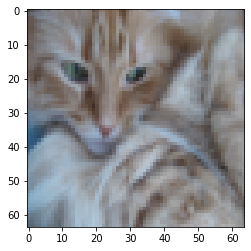

Its label:  1


In [24]:
#plot check
import matplotlib.pyplot as plt
plt.imshow(x_train[2])
plt.show()
print('Its label: ',y_train[0][2])

In [25]:
#normalizing
x_train=x_train/float(256)
x_test=x_test/float(256)
#flatten
x_train=x_train.reshape(-1,np.product(x_train.shape[1:])).T
x_test=x_test.reshape(-1,np.product(x_test.shape[1:])).T

x_train.shape

(12288, 209)

In [26]:
#sigmoid activation function--non linear activation
def sigmoid_activation(Z):
    A=1/(1+np.exp(-Z))
    return A

In [27]:
def initialize_parameters(feature_size):
    w=np.zeros((feature_size,1))
    b=0
    parameters=(w,b)
    return parameters

In [60]:
def compute_cost(X,Y,parameters):
    m=X.shape[1]
    w,b=parameters
    Z=np.dot(w.T,X)+b
    A=sigmoid_activation(Z)
    cost=-1/m*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))
    return cost,A

In [61]:
def backward_propagation(parameters,A,cost,X,Y):
    m=Y.shape[1]
    dZ=(A-Y)
    dw=1/m*np.dot(X,dZ.T)
    db=1/m*np.sum(dZ)
    gradients=(dw,db)
    return gradients

In [62]:
def optimize(X,Y,parameters,n_iterations,learning_rate):
    w,b=parameters
    for i in range(n_iterations):
        cost,A=compute_cost(X,Y,parameters)
        gradients=backward_propagation(parameters,A,cost,X,Y)
        dw,db=gradients
        
        w=w-learning_rate*dw
        b=b-learning_rate*db
        parameters=(w,b)
        
        if(i%10==0):
            print("iteration:",i)
            print("cost:",cost)
            
    parameter=(w,b)
    return parameter

In [63]:
def predict(X,parameters):
    w,b=parameters
    m=X.shape[1]
    y_prediction=np.zeros((1,m))
    Z=np.dot(w.T,X)+b
    A=sigmoid_activation(Z)
    y_prediction=(A>0.5)
    
    return y_prediction
    
    
    

In [66]:
def model(X_train,Y_train,x_test,y_test,n_iteration=1000,learning_rate=0.001):
    feature_size=X_train.shape[0]
    parameters=initialize_parameters(feature_size)
    parameter=optimize(X_train,Y_train,parameters,n_iteration,learning_rate)
    
    y_prediction_train=predict(x_train,parameter)
    y_prediction_test=predict(x_test,parameter)
    train_acc=100-np.mean(np.abs(y_train-y_prediction_train))*100
    test_acc=100-np.mean(np.abs(y_test-y_prediction_test))*100
    print("Train accuracy:",train_acc)
    print("Test accuracy:",test_acc)

In [69]:
model(x_train,y_train,x_test,y_test,n_iteration=10000,learning_rate=0.001)

iteration: 0
cost: 0.6931471805599453
iteration: 10
cost: 0.6437201135803899
iteration: 20
cost: 0.635820101994368
iteration: 30
cost: 0.6286890824183506
iteration: 40
cost: 0.6221871693071322
iteration: 50
cost: 0.6162048342562537
iteration: 60
cost: 0.610655970838488
iteration: 70
cost: 0.6054725155018893
iteration: 80
cost: 0.6006003078200979
iteration: 90
cost: 0.595995925631997
iteration: 100
cost: 0.5916242723769577
iteration: 110
cost: 0.5874567382458412
iteration: 120
cost: 0.5834697963786055
iteration: 130
cost: 0.5796439280171695
iteration: 140
cost: 0.5759627963222245
iteration: 150
cost: 0.5724126084168352
iteration: 160
cost: 0.5689816202678034
iteration: 170
cost: 0.5656597503219223
iteration: 180
cost: 0.5624382762702013
iteration: 190
cost: 0.5593095956261133
iteration: 200
cost: 0.5562670355175243
iteration: 210
cost: 0.5533047006163435
iteration: 220
cost: 0.5504173507711697
iteration: 230
cost: 0.547600301893366
iteration: 240
cost: 0.5448493451439774
iteration: 250


iteration: 2020
cost: 0.3340543818136127
iteration: 2030
cost: 0.3334215732245022
iteration: 2040
cost: 0.33279154095860003
iteration: 2050
cost: 0.332164263333189
iteration: 2060
cost: 0.3315397189218874
iteration: 2070
cost: 0.3309178865505101
iteration: 2080
cost: 0.33029874529301567
iteration: 2090
cost: 0.32968227446753734
iteration: 2100
cost: 0.32906845363249454
iteration: 2110
cost: 0.32845726258278424
iteration: 2120
cost: 0.3278486813460492
iteration: 2130
cost: 0.3272426901790222
iteration: 2140
cost: 0.32663926956394296
iteration: 2150
cost: 0.3260384002050468
iteration: 2160
cost: 0.3254400630251248
iteration: 2170
cost: 0.32484423916214916
iteration: 2180
cost: 0.32425090996596784
iteration: 2190
cost: 0.3236600569950632
iteration: 2200
cost: 0.32307166201337323
iteration: 2210
cost: 0.3224857069871759
iteration: 2220
cost: 0.3219021740820331
iteration: 2230
cost: 0.3213210456597934
iteration: 2240
cost: 0.3207423042756533
iteration: 2250
cost: 0.3201659326752734
iteratio

iteration: 4000
cost: 0.24516213568092468
iteration: 4010
cost: 0.24483962697352188
iteration: 4020
cost: 0.24451799482097478
iteration: 4030
cost: 0.24419723530640133
iteration: 4040
cost: 0.2438773445383717
iteration: 4050
cost: 0.24355831865068847
iteration: 4060
cost: 0.24324015380216876
iteration: 4070
cost: 0.24292284617642879
iteration: 4080
cost: 0.24260639198167086
iteration: 4090
cost: 0.2422907874504729
iteration: 4100
cost: 0.2419760288395797
iteration: 4110
cost: 0.24166211242969707
iteration: 4120
cost: 0.2413490345252873
iteration: 4130
cost: 0.2410367914543681
iteration: 4140
cost: 0.24072537956831228
iteration: 4150
cost: 0.24041479524165074
iteration: 4160
cost: 0.24010503487187657
iteration: 4170
cost: 0.2397960948792522
iteration: 4180
cost: 0.23948797170661776
iteration: 4190
cost: 0.23918066181920186
iteration: 4200
cost: 0.2388741617044346
iteration: 4210
cost: 0.23856846787176172
iteration: 4220
cost: 0.2382635768524617
iteration: 4230
cost: 0.2379594851994641
i

iteration: 6040
cost: 0.19338816472813786
iteration: 6050
cost: 0.19318810701430764
iteration: 6060
cost: 0.19298845645291582
iteration: 6070
cost: 0.19278921174626404
iteration: 6080
cost: 0.19259037160254247
iteration: 6090
cost: 0.19239193473579413
iteration: 6100
cost: 0.19219389986588
iteration: 6110
cost: 0.19199626571844422
iteration: 6120
cost: 0.19179903102487966
iteration: 6130
cost: 0.19160219452229357
iteration: 6140
cost: 0.19140575495347364
iteration: 6150
cost: 0.1912097110668542
iteration: 6160
cost: 0.19101406161648268
iteration: 6170
cost: 0.19081880536198653
iteration: 6180
cost: 0.19062394106854008
iteration: 6190
cost: 0.19042946750683182
iteration: 6200
cost: 0.19023538345303173
iteration: 6210
cost: 0.1900416876887593
iteration: 6220
cost: 0.18984837900105092
iteration: 6230
cost: 0.18965545618232893
iteration: 6240
cost: 0.18946291803036924
iteration: 6250
cost: 0.1892707633482703
iteration: 6260
cost: 0.18907899094442204
iteration: 6270
cost: 0.1888875996324746

iteration: 8080
cost: 0.15953078291734293
iteration: 8090
cost: 0.15939321952533522
iteration: 8100
cost: 0.15925588481754785
iteration: 8110
cost: 0.15911877821792517
iteration: 8120
cost: 0.15898189915242564
iteration: 8130
cost: 0.15884524704901232
iteration: 8140
cost: 0.15870882133764358
iteration: 8150
cost: 0.15857262145026427
iteration: 8160
cost: 0.15843664682079636
iteration: 8170
cost: 0.15830089688512997
iteration: 8180
cost: 0.15816537108111423
iteration: 8190
cost: 0.1580300688485488
iteration: 8200
cost: 0.15789498962917403
iteration: 8210
cost: 0.15776013286666318
iteration: 8220
cost: 0.15762549800661288
iteration: 8230
cost: 0.1574910844965345
iteration: 8240
cost: 0.15735689178584583
iteration: 8250
cost: 0.15722291932586202
iteration: 8260
cost: 0.15708916656978703
iteration: 8270
cost: 0.1569556329727052
iteration: 8280
cost: 0.15682231799157273
iteration: 8290
cost: 0.1566892210852092
iteration: 8300
cost: 0.15655634171428892
iteration: 8310
cost: 0.15642367934133

  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
Train accuracy: 99.04306220095694
Test accuracy: 70.0
